<a href="https://colab.research.google.com/github/kennedynjoroge/kennedynjoroge-Supermarket-Unsupervised-Analysis-with-R/blob/master/Supermarket_Unsupervised_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Crypto_Course_Advertisement"
author: "Kennedy Njoroge"
date: "28/02/2020"
output:
  pdf_document: default
  html_document:
    df_print: paged
---

## Business Understanding

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales 
(total price including tax). Your project has been divided into three parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

### Specifying the question

Part 1: Dimensionality Reduction

Reduce the  dataset to a low dimensional dataset using the t-SNE algorithm or PCA. Perform analysis and provide insights gained from your analysis. Data to use is http://bit.ly/CarreFourDataset

Part 2: Feature Selection

Perform feature selection through the use of the unsupervised learning methods learned earlier this week. Perform analysis and provide insights on the features that contribute the most information to the dataset. Data to use is http://bit.ly/CarreFourDataset

Part 3: Association Rules

Create association rules that will allow you to identify relationships between variables in the dataset. Provided dataset comprises of groups of items that will be associated with others. Provide insights for analysis done. Data to use is http://bit.ly/SupermarketDatasetII

Part 4: Anomaly Detection

Check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection. Data to use is http://bit.ly/CarreFourSalesDataset

### Metric for success

- Dataset with reduced dimensions
- Basket analysis 
- Identified anormalies

### Understanding the context

### Dataset
Dataset links provided above under each of the questions

### Recording the experimental design
- Problem Definition
- Data Sourcing
- Check the Data
- Perform Data Cleaning
- Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
- Implement the Solution
- Challenge the Solution
- Follow up Questions

## Importation

### Import Libraries

In [0]:
install.packages("lubridate") #Date split package
library(lubridate) 
install.packages("dplyr")
library(dplyr)
install.packages("tidyverse")
library(tidyverse)
install.packages("ggplot2")
library(ggplot2)
install.packages("devtools",dependencies=TRUE)
library(devtools) #Load devtools before running ggbiplot otherwise will encounter install_github error
install_github("vqv/ggbiplot") #For plotting PCA
library(ggbiplot)
install.packages("arules") # For association rules library 
library(arules)
install.packages("arulesViz")
library(arulesViz)
install.packages("Rtsne")
library(Rtsne)
install.packages("caret")
library(caret)
install.packages("corrplot")
library(corrplot)
install.packages("anomalize") #Anormally detection
library(anomalize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

In [0]:
#Increase columns and rows from default cols=20 and rows=60
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

### Import the data

#### Sales Dataset 1: for dimensionality reduction and feature selection

In [0]:
df_dim_fet = read.csv('Supermarket_Sales_Data_1.csv')
head(df_dim_fet)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


#### Sales Dataset II:  for association rules

In [0]:
df_assoc = read.csv('Supermarket_Sales_Data_II.csv')
tail(df_assoc)

,shrimp,almonds,avocado,vegetables.mix,green.grapes,whole.weat.flour,yams,cottage.cheese,energy.drink,tomato.juice,low.fat.yogurt,green.tea,honey,salad,mineral.water,salmon,antioxydant.juice,frozen.smoothie,spinach,olive.oil
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
7495,pancakes,light mayo,,,,,,,,,,,,,,,,,,NA
7496,butter,light mayo,fresh bread,,,,,,,,,,,,,,,,,NA
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,,,,,,,,,,,,,,NA
7498,chicken,,,,,,,,,,,,,,,,,,,NA
7499,escalope,green tea,,,,,,,,,,,,,,,,,,NA
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,,,,,,,,,,,,,,,,NA


#### Sales Forecasting Dataset: for anormaly analysis

In [0]:
df_anom = read.csv('Supermarket_Sales_Forecasting.csv')
tail(df_anom)

,Date,Sales
,<fct>,<dbl>
995,2/18/2019,63.9975
996,1/29/2019,42.3675
997,3/2/2019,1022.4900
998,2/9/2019,33.4320
999,2/22/2019,69.1110
1000,2/18/2019,649.2990


## Dimensionality Reduction

To apply t-Distributed Stochastic Neighbor Embedding (t-SNE) algorithm or Principal Component Analysis (PCA) to solve the problem

## Using Principal Component Analsis(PCA)

Objective: Simplify the dataset which has many variables by turning the original variables into a smaller number of "Principal Components".

### Explore and Cleanup the data before running PCA and t-SNE

#### Check the data structure

In [0]:
str(df_dim_fet)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

Check unique records in features with factor data type

In [0]:
print("Branch")
unique(df_dim_fet$Branch)
print("Customer Type")
unique(df_dim_fet$Customer.type)
print("Gender")
unique(df_dim_fet$Gender)
print("Product Line")
unique(df_dim_fet$Product.line)
print("Payment")
unique(df_dim_fet$Payment)

[1] "Branch"


[1] A C B
Levels: A B C

[1] "Customer Type"


[1] Member Normal
Levels: Member Normal

[1] "Gender"


[1] Female Male  
Levels: Female Male

[1] "Product Line"


[1] Health and beauty      Electronic accessories Home and lifestyle    
[4] Sports and travel      Food and beverages     Fashion accessories   
6 Levels: Electronic accessories Fashion accessories ... Sports and travel

[1] "Payment"


[1] Ewallet     Cash        Credit card
Levels: Cash Credit card Ewallet

#### Check Missing Values 

In [0]:
#Count the missing values
colSums(is.na(df_dim_fet))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

No missing values.

#### Encoding the columns from character to numerical

In [0]:
# Convert data types using as.integer
# Branch
df_dim_fet$Branch_Enc<-as.integer(as.factor(df_dim_fet$Branch))
# Customer Type
df_dim_fet$Customer_Type_Enc<-as.integer(as.factor(df_dim_fet$Customer.type))
# Gender
df_dim_fet$Gender_Enc<-as.integer(as.factor(df_dim_fet$Gender))
# Product.line
df_dim_fet$Product_Line_Enc<-as.integer(as.factor(df_dim_fet$Product.line))
#Payment
df_dim_fet$Payment_Enc<-as.integer(as.factor(df_dim_fet$Payment))

In [0]:
# Split date year, month and day.
# Convert to date datatype first then split thereafter
df_dim_fet$Date <- as.Date(df_dim_fet$Date, "%m/%d/%Y")
df_dim_fet$year <- year(ymd(df_dim_fet$Date))
df_dim_fet$month <- month(ymd(df_dim_fet$Date)) 
df_dim_fet$day <- day(ymd(df_dim_fet$Date))

In [0]:
# Convert date to time
df_dim_fet$hour = format(strptime(df_dim_fet$Time,"%H:%M"),'%H')
df_dim_fet$minute = format(strptime(df_dim_fet$Time,"%H:%M"),'%M')

In [0]:
head(df_dim_fet)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Branch_Enc,Customer_Type_Enc,Gender_Enc,Product_Line_Enc,Payment_Enc,year,month,day,hour,minute
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,1,1,1,4,3,2019,1,5,13,08
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200,3,2,1,1,1,2019,3,8,10,29
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255,1,2,2,5,2,2019,3,3,13,23
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,1,1,2,4,3,2019,1,27,20,33
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,1,2,2,6,3,2019,2,8,10,37
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165,3,2,2,1,3,2019,3,25,18,30


#### Select numerical/Integer columns only

In [0]:
df_dim_fet_num <- select_if(df_dim_fet,is.numeric)
str(df_dim_fet_num)

'data.frame':	1000 obs. of  16 variables:
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ Branch_Enc             : int  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer_Type_Enc      : int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender_Enc             : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Product_Line_Enc       : int  4 1 5 4 6 1 1 5 4 3 ...
 $ Payment_Enc            : int  3 1 2 3 3 3 3 3 2 2 ...
 $ year                   : num  2019 2019 2019 2019 2019 ...
 $ month                  : num  1 3 3 1 2 3 2 2 1 2 ...
 $ day                    : int  5 8 

PCA identifies variances within columns. If there are columns with zero variance, drop them as PCA will return error.

In [0]:
# Identify the columns with zero column variance.
names(df_dim_fet_num[, sapply(df_dim_fet_num, function(v) var(v, na.rm=TRUE)==0)])

[1] "gross.margin.percentage" "year"

'gross.margin.percentage' has constant value 4.76 and year has constant value 2019.

Drop the columns

In [0]:
# Drop the columns as they result to error "stop("cannot rescale a constant/zero column to unit variance")"
df_dim_fet_num <- subset(df_dim_fet_num, select = -c(gross.margin.percentage, year))

In [0]:
dim(df_dim_fet_num)

[1] 1000   14

### Run PCA

prcomp utility run below to create the principal components

In [0]:
sup_pca <- prcomp(df_dim_fet_num, center = TRUE, scale. = TRUE)
summary(sup_pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2203 1.08227 1.06969 1.02580 1.00895 0.99359 0.97647
Proportion of Variance 0.3521 0.08367 0.08173 0.07516 0.07271 0.07052 0.06811
Cumulative Proportion  0.3521 0.43578 0.51751 0.59267 0.66538 0.73590 0.80401
                           PC8     PC9   PC10    PC11      PC12      PC13
Standard deviation     0.96596 0.94903 0.9057 0.29961 2.109e-16 9.849e-17
Proportion of Variance 0.06665 0.06433 0.0586 0.00641 0.000e+00 0.000e+00
Cumulative Proportion  0.87066 0.93499 0.9936 1.00000 1.000e+00 1.000e+00
                            PC14
Standard deviation     6.024e-17
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

We obtained 14 principal components where each explains a percentage of the total 
variation in the dataset. PC1 explains 35% of the total variance, which means that 
nearly one-third of the information in the dataset (14 variables) can be explained by 
PC1.
PC1 to PC10 explains 99% of the variance.

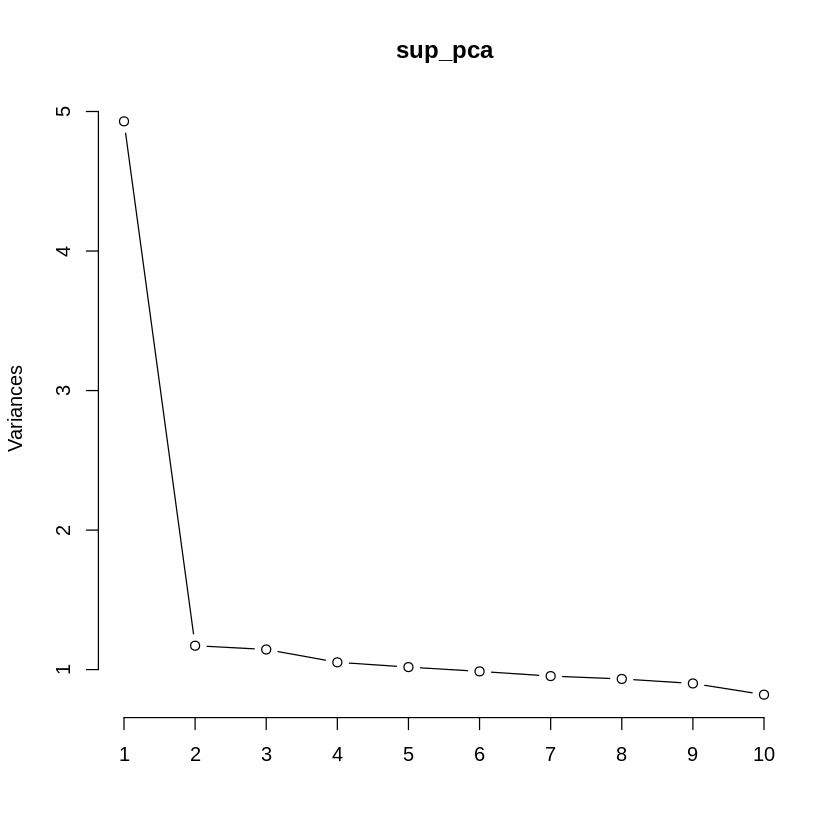

In [0]:
plot(sup_pca, type="l")

From above graph, most of the variances are explained by component 1. Component 2 to 10 have almost similar weights


**Check which features contribute to PC1**

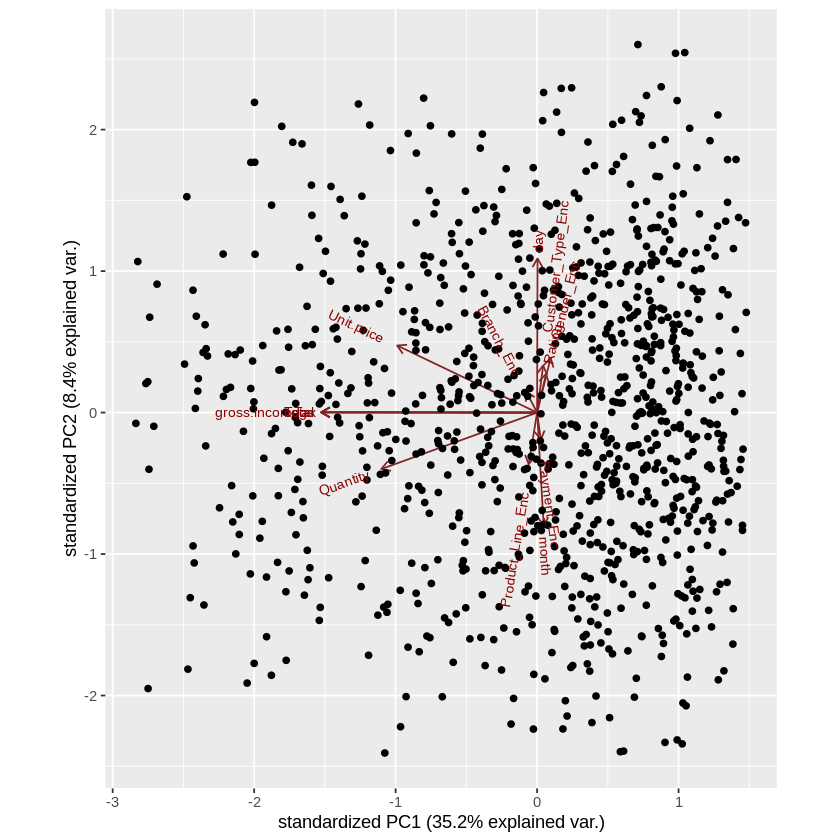

In [0]:
ggbiplot(sup_pca)

From above graph, Gender, customertype, payment, month contribute highly to Principal Component 1.


**Populate rowvalues as labels**

The dataset is huge so expanding needed to vizualize the values

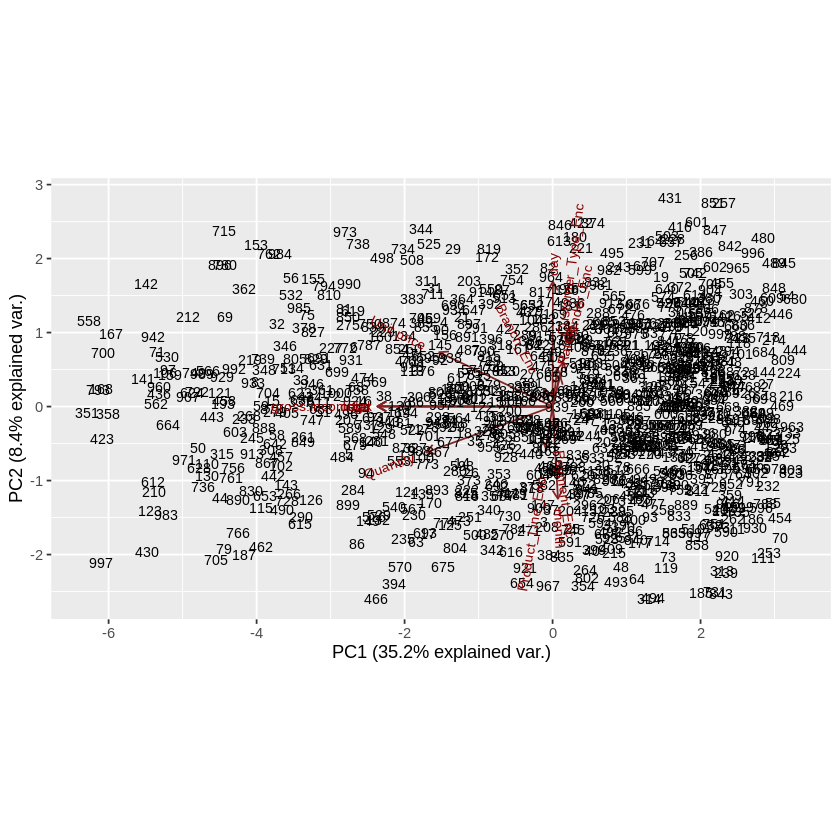

In [0]:
ggbiplot(sup_pca, labels=rownames(df_dim_fet_num), obs.scale = 1, var.scale = 1)

**Interpretation**

PCA 1 to 10 are able to explain the variance in the data as they represent 99.36 of the variance. The other PC11 to 14 should be dropped.

To complete further classification, data values impact on principal components should be explored to identify the clusters

## Run Stochastic Neighbour Embedding(t-SNE)

In [0]:
tsne <- Rtsne(df_dim_fet_num, dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)

Performing PCA
Read the 1000 x 14 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.13 seconds (sparsity = 0.101248)!
Learning embedding...
Iteration 50: error is 59.798317 (50 iterations in 0.13 seconds)
Iteration 100: error is 52.242226 (50 iterations in 0.12 seconds)
Iteration 150: error is 50.899999 (50 iterations in 0.12 seconds)
Iteration 200: error is 50.350394 (50 iterations in 0.12 seconds)
Iteration 250: error is 50.078563 (50 iterations in 0.12 seconds)
Iteration 300: error is 0.628649 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.452879 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.405151 (50 iterations in 0.14 seconds)
Iteration 450: error is 0.387778 (50 iterations in 0.13 seconds)
Iteration 500: error is 0.378001 (50 iterations in 0.14 seconds)
Fitting performed in 1.26 seconds.


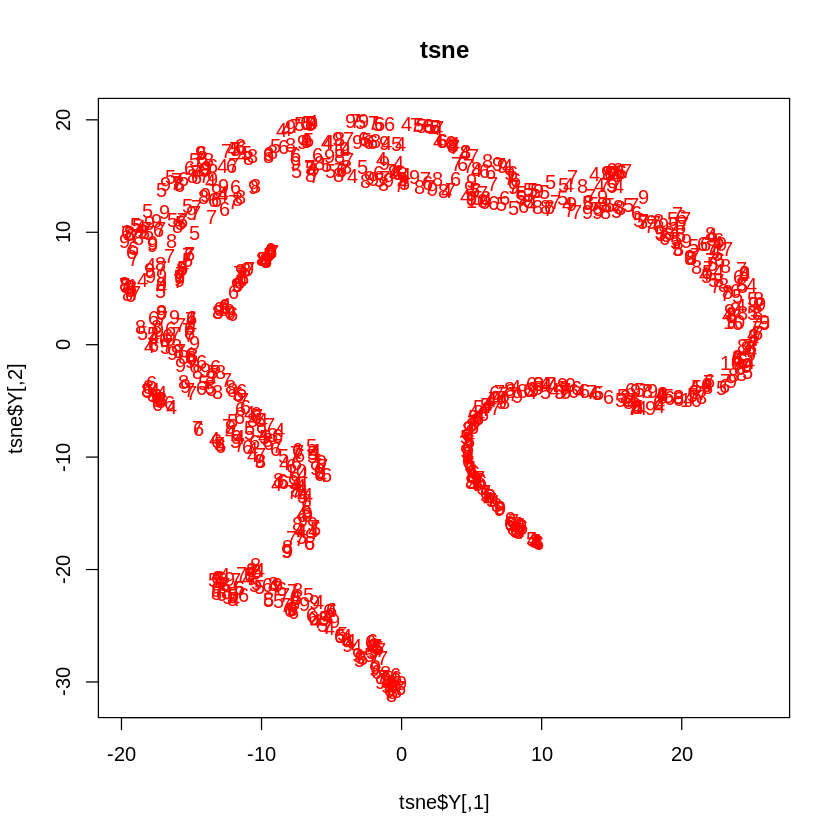

In [0]:
df_dim_fet_num$Rating_num = as.integer(df_dim_fet_num$Rating)

# Curating the database for analysis 
# 
Labels<-df_dim_fet_num$Rating_num
df_dim_fet_num$Rating_num<-as.factor(df_dim_fet_num$Rating_num)

# For plotting
colors = rainbow(length(df_dim_fet_num$Rating_num))
names(colors) = unique(df_dim_fet_num$Rating_num)

plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=df_dim_fet_num$Rating_num, col=colors[df_dim_fet_num$Rating_num])

## Feature Selection
Feature selection to identify important variables from the dataset

In [0]:
path<-"http://bit.ly/FeatureSelectionDataset" 

Dataset<-read.csv(path, sep = ",", dec = ".",row.names = 1)
Dataset<-Dataset[-4] 
head(Dataset,3)

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [0]:
# Calculating the correlation matrix
# ---
#
correlationMatrix <- cor(Dataset)

In [0]:
# Find attributes that are highly correlated
# ---
#
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

In [0]:
# Highly correlated attributes
# ---
# 
highlyCorrelated

names(Dataset[,highlyCorrelated])

[1] 3 9 4

[1] "indus" "tax"   "nox"

In [0]:
# We can remove the variables with a higher correlation 
# and comparing the results graphically as shown below
# ---
# 
# Removing Redundant Features 
# ---
# 
Dataset2<-Dataset[-highlyCorrelated]

## Association Analysis
To build association rules

### Explore and Cleanup Association Data

In [0]:
# View sample supermarket data on which we will run association rules
head(df_assoc)

,shrimp,almonds,avocado,vegetables.mix,green.grapes,whole.weat.flour,yams,cottage.cheese,energy.drink,tomato.juice,low.fat.yogurt,green.tea,honey,salad,mineral.water,salmon,antioxydant.juice,frozen.smoothie,spinach,olive.oil
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,NA
2,chutney,,,,,,,,,,,,,,,,,,,NA
3,turkey,avocado,,,,,,,,,,,,,,,,,,NA
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,NA
5,low fat yogurt,,,,,,,,,,,,,,,,,,,NA
6,whole wheat pasta,french fries,,,,,,,,,,,,,,,,,,NA


In [0]:
# Data dimensions
dim(df_assoc)

[1] 7500   20

#### Check the data structure

In [0]:
#Structure
str(df_assoc)

'data.frame':	7500 obs. of  20 variables:
 $ shrimp           : Factor w/ 115 levels "almonds","antioxydant juice",..: 15 27 108 72 65 112 98 49 43 37 ...
 $ almonds          : Factor w/ 118 levels "","almonds","antioxydant juice",..: 69 1 5 71 1 43 63 99 1 85 ...
 $ avocado          : Factor w/ 116 levels "","almonds","antioxydant juice",..: 36 1 1 37 1 1 93 53 1 1 ...
 $ vegetables.mix   : Factor w/ 115 levels "","almonds","antioxydant juice",..: 1 1 1 112 1 1 1 1 1 1 ...
 $ green.grapes     : Factor w/ 111 levels "","almonds","antioxydant juice",..: 1 1 1 51 1 1 1 1 1 1 ...
 $ whole.weat.flour : Factor w/ 107 levels "","almonds","antioxydant juice",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ yams             : Factor w/ 103 levels "","almonds","antioxydant juice",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cottage.cheese   : Factor w/ 99 levels ""," asparagus",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ energy.drink     : Factor w/ 89 levels "","almonds","antioxydant juice",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ tomato.juice    

19 columns are factors while 1 is a logical data type

In [0]:
# Summary to show information such as the most purchased items,no. of items purchased in each transaction etc
summary(df_assoc)

               shrimp              almonds              avocado    
 mineral water    : 577                :1754                :3112  
 burgers          : 576   mineral water: 484   mineral water: 375  
 turkey           : 458   spaghetti    : 411   spaghetti    : 279  
 chocolate        : 391   eggs         : 302   eggs         : 225  
 frozen vegetables: 373   ground beef  : 291   milk         : 213  
 spaghetti        : 354   french fries : 243   french fries : 180  
 (Other)          :4771   (Other)      :4015   (Other)      :3116  
       vegetables.mix       green.grapes      whole.weat.flour
              :4156               :4972               :5637   
 mineral water: 201   green tea   : 153   french fries: 107   
 eggs         : 181   eggs        : 134   eggs        : 102   
 french fries : 174   french fries: 130   green tea   : 100   
 spaghetti    : 167   chocolate   : 115   chocolate   :  71   
 milk         : 149   milk        : 114   pancakes    :  69   
 (Other)      :

#### Check missing values

In [0]:
# Count the missing values
colSums(is.na(df_assoc))

shrimp           almonds           avocado    vegetables.mix 
                0                 0                 0                 0 
     green.grapes  whole.weat.flour              yams    cottage.cheese 
                0                 0                 0                 0 
     energy.drink      tomato.juice    low.fat.yogurt         green.tea 
                0                 0                 0                 0 
            honey             salad     mineral.water            salmon 
                0                 0                 0                 0 
antioxydant.juice   frozen.smoothie           spinach         olive.oil 
                0                 0                 0              7500

All rows in olive oil column are missing so column will be dropped

In [0]:
# Drop olive oil column from dataframe
df_assoc$olive.oil <- NULL

In [0]:
# Verify that column is successfully dropped
str(df_assoc)

'data.frame':	7500 obs. of  19 variables:
 $ shrimp           : Factor w/ 115 levels "almonds","antioxydant juice",..: 15 27 108 72 65 112 98 49 43 37 ...
 $ almonds          : Factor w/ 118 levels "","almonds","antioxydant juice",..: 69 1 5 71 1 43 63 99 1 85 ...
 $ avocado          : Factor w/ 116 levels "","almonds","antioxydant juice",..: 36 1 1 37 1 1 93 53 1 1 ...
 $ vegetables.mix   : Factor w/ 115 levels "","almonds","antioxydant juice",..: 1 1 1 112 1 1 1 1 1 1 ...
 $ green.grapes     : Factor w/ 111 levels "","almonds","antioxydant juice",..: 1 1 1 51 1 1 1 1 1 1 ...
 $ whole.weat.flour : Factor w/ 107 levels "","almonds","antioxydant juice",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ yams             : Factor w/ 103 levels "","almonds","antioxydant juice",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cottage.cheese   : Factor w/ 99 levels ""," asparagus",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ energy.drink     : Factor w/ 89 levels "","almonds","antioxydant juice",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ tomato.juice    

#### Exploring items frequency


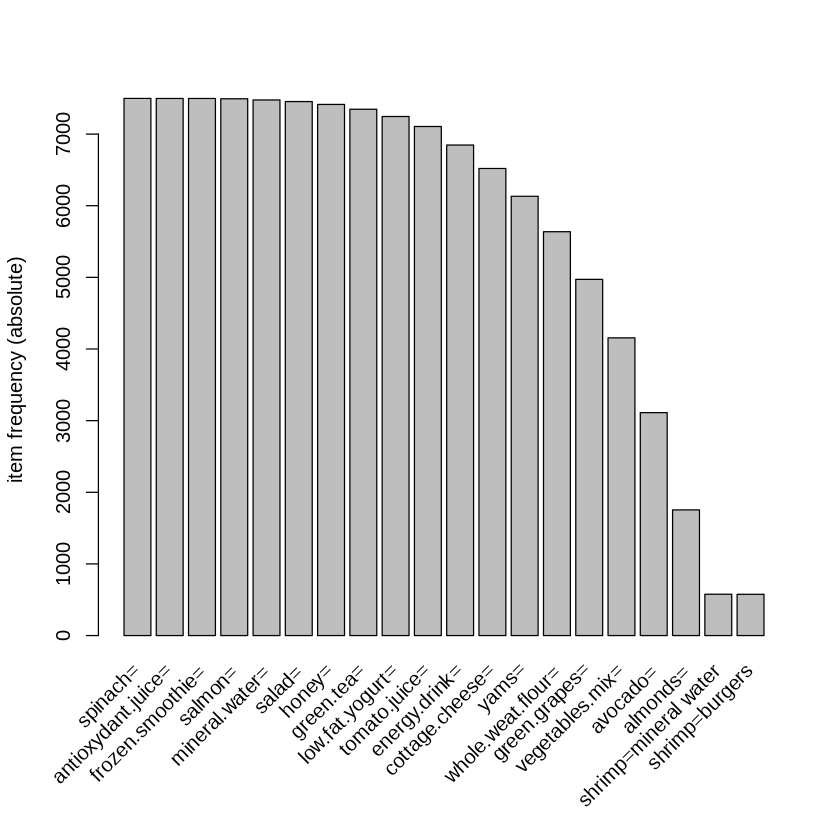

In [0]:
## Create an item frequency plot for the top 20 items
# coerce data frame into transaction. Plotting the dataframe directly fails
trans <- as(df_assoc, "transactions")
# plot item frequency
itemFrequencyPlot(trans,topN=20,type="absolute")

Spinach, antioxydant.juice, frozen.smoothie, salmon, mineral water are the top 5 items in terms of frequency being over 7000. 
Shrimp=burgers and shrimp=mineral water are the lowest

### Run Association rules

Calling apriori function to run the association rule on the datagrame. Passed support and confidence parameters.

Minimum support to 0.001
Minimum confidence of 0.8

In [0]:
install.packages("arules") # For association rules library 
library(arules)
install.packages("arulesViz")
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
df_assoc = read.csv('Supermarket_Sales_Data_II.csv')
tail(df_assoc)

,shrimp,almonds,avocado,vegetables.mix,green.grapes,whole.weat.flour,yams,cottage.cheese,energy.drink,tomato.juice,low.fat.yogurt,green.tea,honey,salad,mineral.water,salmon,antioxydant.juice,frozen.smoothie,spinach,olive.oil
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
7495,pancakes,light mayo,,,,,,,,,,,,,,,,,,NA
7496,butter,light mayo,fresh bread,,,,,,,,,,,,,,,,,NA
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,,,,,,,,,,,,,,NA
7498,chicken,,,,,,,,,,,,,,,,,,,NA
7499,escalope,green tea,,,,,,,,,,,,,,,,,,NA
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,,,,,,,,,,,,,,,,NA


Confidence is an indication of how often the rule has been found to be true. 

Support is an indication of how frequently the itemset appears in the dataset


In [0]:
# Get the rules
rules <- apriori(df_assoc, parameter = list(supp = 0.5, conf = 0.8,target = "rules",minlen=2))
#rules <- sort(rules, by="lift", decreasing=TRUE)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3750 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1280 item(s), 7500 transaction(s)] done [0.04s].
sorting and recoding items ... [16 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(df_assoc, parameter = list(supp = 0.5, conf = 0.8, target = "rules", :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.02s].
writing ... [425218 rule(s)] done [0.08s].
creating S4 object  ... done [0.12s].


Explore the model i.e. the size of rules

In [0]:
summary(rules)

set of 425218 rules

rule length distribution (lhs + rhs):sizes
    2     3     4     5     6     7     8     9    10 
  204  1478  6576 20134 45002 75943 98616 99417 77848 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   7.000   8.000   7.986   9.000  10.000 

summary of quality measures:
    support         confidence          lift           count     
 Min.   :0.5541   Min.   :0.8108   Min.   :1.000   Min.   :4156  
 1st Qu.:0.5541   1st Qu.:1.0000   1st Qu.:1.001   1st Qu.:4156  
 Median :0.6629   Median :1.0000   Median :1.021   Median :4972  
 Mean   :0.6455   Mean   :0.9882   Mean   :1.095   Mean   :4841  
 3rd Qu.:0.7516   3rd Qu.:1.0000   3rd Qu.:1.150   3rd Qu.:5637  
 Max.   :0.9996   Max.   :1.0000   Max.   :1.508   Max.   :7497  

mining info:
     data ntransactions support confidence
 df_assoc          7500     0.5        0.8

Model has 2109165 rules from 7500 transactions if minimum support of 0.04 is specified.

The rules reduce to 425231 when minimum support is increased to 0.5. This is preffered to prevent persistent session crashes due to too many rules.

when minlen=2 parameter is applied to eliminate the products whose LHS is blank, the rules are reduced to 425218

##### Show top 5 rules

In [0]:
# Show the top 3 rules, but only 2 digits.
#options(digits=2)
inspect(rules[1:20])

     lhs                    rhs                  support   confidence lift    
[1]  {vegetables.mix=}   => {green.grapes=}      0.5541333 1.0000000  1.508447
[2]  {green.grapes=}     => {vegetables.mix=}    0.5541333 0.8358809  1.508447
[3]  {vegetables.mix=}   => {whole.weat.flour=}  0.5541333 1.0000000  1.330495
[4]  {vegetables.mix=}   => {yams=}              0.5541333 1.0000000  1.223092
[5]  {vegetables.mix=}   => {cottage.cheese=}    0.5541333 1.0000000  1.150307
[6]  {vegetables.mix=}   => {energy.drink=}      0.5541333 1.0000000  1.095370
[7]  {vegetables.mix=}   => {tomato.juice=}      0.5541333 1.0000000  1.055446
[8]  {vegetables.mix=}   => {low.fat.yogurt=}    0.5541333 1.0000000  1.035197
[9]  {vegetables.mix=}   => {green.tea=}         0.5541333 1.0000000  1.020825
[10] {vegetables.mix=}   => {honey=}             0.5541333 1.0000000  1.011600
[11] {vegetables.mix=}   => {salad=}             0.5541333 1.0000000  1.006171
[12] {vegetables.mix=}   => {mineral.water=}     0.5

If someone buys vegetables.mix, they are 100% likely to buy green.grapes too.
If someon buys hole.weat.flour, they are 88% likely to buy green.grapes.

## Anomaly Detection
Build a model to detect anomalies within a dataset.

In [0]:
install.packages("anomalize") #Anormally detection
library(anomalize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘padr’, ‘xts’, ‘zoo’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’


══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [0]:
# View the data to check anormalies on
head(df_anom)

,Date,Sales
,<fct>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [0]:
df_anom %>%
# time_decompose(count) %>%
# anomalize(remainder) %>%
# time_recompose() %>%
# plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

ERROR: ignored

In [0]:
install.packages("coindeskr")
library(coindeskr) #bitcoin price extraction from coindesk

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
btc <- get_historic_price(start = "2017-01-01")

In [0]:
head(btc)

,Price
,<dbl>
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
2017-01-06,895.6700
2017-01-07,905.1700
2017-01-08,913.5238
2017-01-09,899.3500


In [0]:
btc_ts <- btc %>% rownames_to_column() %>% as.tibble() %>% mutate(date = as.Date(rowname)) %>% select(-one_of('rowname'))

ERROR: ignored